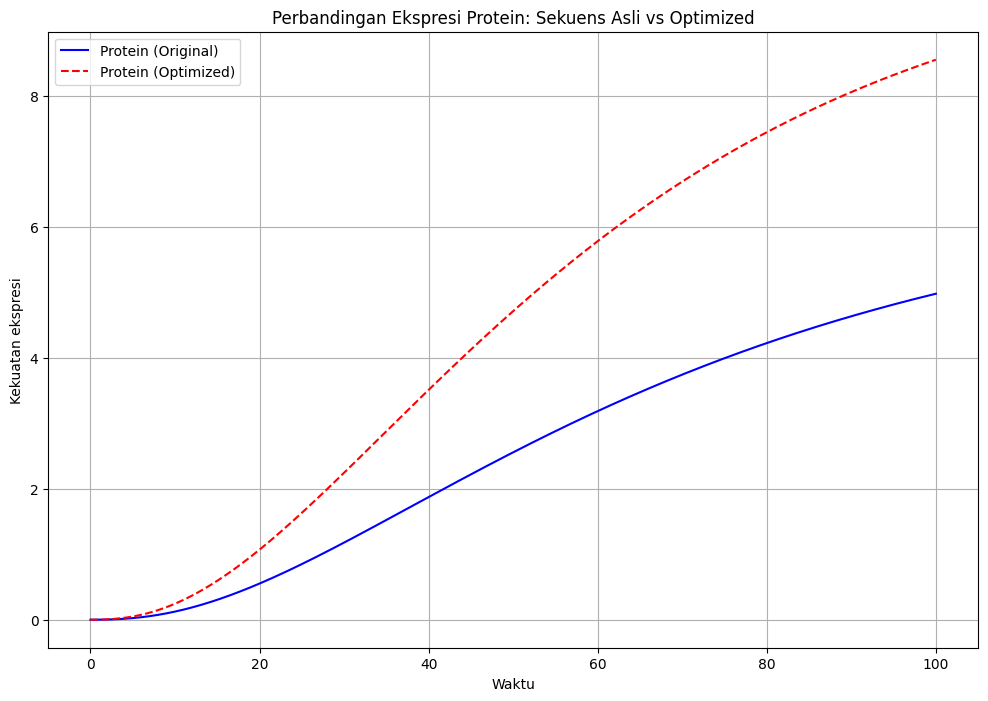

Perbandingan Parameter:
Kekuatan Promoter (Original): 0.20
Kekuatan Promoter (Optimized): 0.40
CAI (Original): 0.02
CAI (Optimized): 0.03
Peningkatan Protein Akhir: 71.78%


In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def calculate_CAI(sequence, codon_usage):
    """Calculate Codon Adaptation Index (CAI)"""
    # Implementasi perhitungan CAI yang lebih realistis
    codons = [sequence[i:i+3] for i in range(0, len(sequence), 3)]
    cai_values = [codon_usage.get(codon, 0.1) for codon in codons]
    return np.exp(np.mean(np.log(cai_values)))

def predict_promoter_strength(sequence):
    """Predict promoter strength based on sequence motifs"""
    # Implementasi prediksi kekuatan promoter yang lebih realistis
    # Contoh: menghitung frekuensi motif TATA box
    tata_count = sequence.count('TATAAA')
    return min(1.0, 0.2 + 0.2 * tata_count)

def gene_expression_model(y, t, params):
    DNA, mRNA, Protein = y
    (k_transcription, k_mRNA_degradation, k_translation, k_protein_degradation,
     k_DNA_activation, k_DNA_deactivation) = params
    
    dDNA_dt = k_DNA_activation * (1 - DNA) - k_DNA_deactivation * DNA
    dmRNA_dt = k_transcription * DNA - k_mRNA_degradation * mRNA
    dProtein_dt = k_translation * mRNA - k_protein_degradation * Protein
    
    return [dDNA_dt, dmRNA_dt, dProtein_dt]

def optimize_sequence(original_sequence, codon_usage):
    """Optimize coding sequence based on codon usage"""
    optimized = ''
    for i in range(0, len(original_sequence), 3):
        codon = original_sequence[i:i+3]
        amino_acid = genetic_code[codon]
        best_codon = max(codon_table[amino_acid], key=lambda c: codon_usage.get(c, 0))
        optimized += best_codon
    return optimized

def optimize_promoter(original_promoter):
    """Optimize promoter sequence"""
    # Simpel optimization: menambahkan TATA box jika tidak ada
    if 'TATAAA' not in original_promoter:
        return original_promoter[:30] + 'TATAAA' + original_promoter[36:]
    return original_promoter

# Simulasi data sekuens (ganti dengan data sebenarnya)
original_sequences = {
    'promoter': 'ATCG' * 25,
    'coding': 'TTTCATTATGATCGTAATAATATTGCTGTTGGTGCTGATGAATCTGTTGTTAAAGAAGCTCATCGTGAAGTTATTAATTCTTCTACTGAAGGTCTTCTTCTTAATATTGATAAAGATATTCGTAAAATTCTTTCTGGTTATATTGTTGAAATTGAAGATACTGAAGGTCTTAAAGAAGTTATTAATGATCGTTATGATATGCTTAATATTTCTTCTCTTCGTCAAGATGGTAAAACTTTTATTGATTTTAAAAAATATAATGATAAACTTCCTCTTTATATTTCTAATCCTAATTATAAAGTTAATGTTTATGCTGTTACTAAAGAAAATACTATTATTAATCCTTCTGAAAATGGTGATACTTCTACTAATGGTATTAAAAAAATTCTTATTTTTTCTAAAAAAGGTTATGAAATTGGTGAAGCTGCTGCTAAAGCTGGTGGTCATGGTGATGTTGGTATGCATGTTAAAGAAAAAGAAAAAAATAAAGATGAAAATAAACGTAAAGATGAAGAACGTAATAAAACTCAAGAAGAACATCTTAAAGAAATTATGAAACATATTGTTAAAATTGAAGTTAAAGGTGAAGAAGCTGTTAAAAAAGAAGCTGCTGAAAAACTTCTTGAAAAAGTTCCTTCTGATGTTCTTGAAATGTATAAAGCTATTGGTGGTAAAATTTATATTGTTGATGGTGATATTACTAAACATATTTCTCTTGAAGCTCTTTCTGAAGATAAAAAAAAAATTAAAGATATTTATGGTAAAGATGCTCTTCTTCATGAACATTATGTTTATGCTAAAGAAGGTTATGAACCTGTTCTTGTTATTCAATCTTCTGAAGATTATGTTGAAAATACTGAAAAAGCTCTTAATGTTTATTATGAAATTGGTAAAATTCTTTCTCGTGATATTCTTTCTAAAATTAATCAACCTTATCAAAAATTTCTTGATGTTCTTAATACTATTAAAAATGCTTCTGATTCTGATGGTCAAGATCTTCTTTTTACTAATCAACTTAAAGAACATCCTACTGATTTTTCTGTTGAATTTCTTGAACAAAATTCTAATGAAGTTCAAGAAGTTTTTGCTAAAGCTTTTGCTTATTATATTGAACCTCAACATCGTGATGTTCTTCAACTTTATGCTCCTGAAGCTTTTAATTATATGGATAAATTTAATGAACAAGAAATTAATCTT' * 25,
}

# Data penggunaan kodon Brassica juncea (contoh, ganti dengan data sebenarnya)
# Tabel penggunaan kodon lengkap (contoh hipotetis)
codon_usage = {
    # Kodon untuk Asam Amino Fenilalanin (F)
    'TTT': 0.0175, 'TTC': 0.0268,

    # Kodon untuk Asam Amino Leusin (L)
    'TTA': 0.0081, 'TTG': 0.0181,
    'CTT': 0.0225, 'CTC': 0.0233, 'CTA': 0.0079, 'CTG': 0.0099,

    # Kodon untuk Asam Amino Isoleusin (I)
    'ATT': 0.0168, 'ATC': 0.0243, 'ATA': 0.0096,

    # Kodon untuk Asam Amino Metionin (M)
    'ATG': 0.0249,

    # Kodon untuk Asam Amino Valin (V)
    'GTT': 0.0245, 'GTC': 0.0185, 'GTA': 0.0060, 'GTG': 0.0193,

    # Kodon untuk Asam Amino Serin (S)
    'TCT': 0.0189, 'TCC': 0.0144, 'TCA': 0.0124, 'TCG': 0.0072,

    # Kodon untuk Asam Amino Prolin (P)
    'CCT': 0.0179, 'CCC': 0.0079, 'CCA': 0.0138, 'CCG': 0.0096,

    # Kodon untuk Asam Amino Treonin (T)
    'ACT': 0.0171, 'ACC': 0.0171, 'ACA': 0.0112, 'ACG': 0.0099,

    # Kodon untuk Asam Amino Alanin (A)
    'GCT': 0.0327, 'GCC': 0.0162, 'GCA': 0.0148, 'GCG': 0.0102,

    # Kodon untuk Asam Amino Tirosin (Y)
    'TAT': 0.0114, 'TAC': 0.0198,

    # Kodon untuk Asam Amino Histidin (H)
    'CAT': 0.0129, 'CAC': 0.0133,

    # Kodon untuk Asam Amino Glutamin (Q)
    'CAA': 0.0148, 'CAG': 0.0157,

    # Kodon untuk Asam Amino Asparagin (N)
    'AAT': 0.0132, 'AAC': 0.0275,

    # Kodon untuk Asam Amino Lisin (K)
    'AAA': 0.0235, 'AAG': 0.0370,

    # Kodon untuk Asam Amino Asam Aspartat (D)
    'GAT': 0.0280, 'GAC': 0.0268,

    # Kodon untuk Asam Amino Asam Glutamat (E)
    'GAA': 0.0265, 'GAG': 0.0400,

    # Kodon untuk Asam Amino Sistein (C)
    'TGT': 0.0082, 'TGC': 0.0102,

    # Kodon untuk Asam Amino Tryptofan (W)
    'TGG': 0.0123,

    # Kodon untuk Asam Amino Arginin (R)
    'CGT': 0.0101, 'CGC': 0.0055, 'CGA': 0.0035, 'CGG': 0.0044,
    'AGA': 0.0146, 'AGG': 0.0122,

    # Kodon untuk Asam Amino Glisin (G)
    'GGT': 0.0241, 'GGC': 0.0126, 'GGA': 0.0245, 'GGG': 0.0121,

    # Kodon Stop
    'TAA': 0.0013, 'TAG': 0.0003, 'TGA': 0.0013
}


# Tabel kode genetik (disederhanakan)
genetic_code = {
    'TTT': 'F', 'TTC': 'F', 'TTA': 'L', 'TTG': 'L',
    'CTT': 'L', 'CTC': 'L', 'CTA': 'L', 'CTG': 'L',
    'ATT': 'I', 'ATC': 'I', 'ATA': 'I', 'ATG': 'M',
    'GTT': 'V', 'GTC': 'V', 'GTA': 'V', 'GTG': 'V',
    'TCT': 'S', 'TCC': 'S', 'TCA': 'S', 'TCG': 'S',
    'CCT': 'P', 'CCC': 'P', 'CCA': 'P', 'CCG': 'P',
    'ACT': 'T', 'ACC': 'T', 'ACA': 'T', 'ACG': 'T',
    'GCT': 'A', 'GCC': 'A', 'GCA': 'A', 'GCG': 'A',
    'TAT': 'Y', 'TAC': 'Y', 'TAA': 'STOP', 'TAG': 'STOP',
    'CAT': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q',
    'AAT': 'N', 'AAC': 'N', 'AAA': 'K', 'AAG': 'K',
    'GAT': 'D', 'GAC': 'D', 'GAA': 'E', 'GAG': 'E',
    'TGT': 'C', 'TGC': 'C', 'TGA': 'STOP', 'TGG': 'W',
    'CGT': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R',
    'AGT': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R',
    'GGT': 'G', 'GGC': 'G', 'GGA': 'G', 'GGG': 'G'
}

codon_table = {
    'F': ['TTT', 'TTC'], 'L': ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG'],
    'I': ['ATT', 'ATC', 'ATA'], 'M': ['ATG'], 'V': ['GTT', 'GTC', 'GTA', 'GTG'],
    'S': ['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'], 'P': ['CCT', 'CCC', 'CCA', 'CCG'],
    'T': ['ACT', 'ACC', 'ACA', 'ACG'], 'A': ['GCT', 'GCC', 'GCA', 'GCG'],
    'Y': ['TAT', 'TAC'], 'H': ['CAT', 'CAC'], 'Q': ['CAA', 'CAG'],
    'N': ['AAT', 'AAC'], 'K': ['AAA', 'AAG'], 'D': ['GAT', 'GAC'],
    'E': ['GAA', 'GAG'], 'C': ['TGT', 'TGC'], 'W': ['TGG'], 'R': ['CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'],
    'G': ['GGT', 'GGC', 'GGA', 'GGG'], 'STOP': ['TAA', 'TAG', 'TGA']
}

# Optimisasi sekuens
optimized_sequences = {
    'promoter': optimize_promoter(original_sequences['promoter']),
    'coding': optimize_sequence(original_sequences['coding'], codon_usage)
}

# Perhitungan parameter untuk kedua sekuens
params_original = {
    'k_transcription': 0.5 * predict_promoter_strength(original_sequences['promoter']),
    'k_translation': 1.0 * calculate_CAI(original_sequences['coding'], codon_usage),
    'k_mRNA_degradation': 0.1,
    'k_protein_degradation': 0.05,
    'k_DNA_activation': 0.1,
    'k_DNA_deactivation': 0.05
}

params_optimized = {
    'k_transcription': 0.5 * predict_promoter_strength(optimized_sequences['promoter']),
    'k_translation': 1.0 * calculate_CAI(optimized_sequences['coding'], codon_usage),
    'k_mRNA_degradation': 0.1,
    'k_protein_degradation': 0.05,
    'k_DNA_activation': 0.1,
    'k_DNA_deactivation': 0.05
}

# Simulasi untuk kedua sekuens
t = np.linspace(0, 100, 1000)
y0 = [0.1, 0, 0]  # Kondisi awal: DNA aktif, mRNA, Protein

solution_original = odeint(gene_expression_model, y0, t, args=(tuple(params_original.values()),))
solution_optimized = odeint(gene_expression_model, y0, t, args=(tuple(params_optimized.values()),))

# Plotting hasil
plt.figure(figsize=(12, 8))
plt.plot(t, solution_original[:, 2], label='Protein (Original)', color='blue')
plt.plot(t, solution_optimized[:, 2], label='Protein (Optimized)', color='red', linestyle='--')
plt.xlabel('Waktu')
plt.ylabel('Kekuatan ekspresi')
plt.title('Perbandingan Ekspresi Protein: Sekuens Asli vs Optimized')
plt.legend()
plt.grid(True)
plt.show()

# Analisis perbandingan
print("Perbandingan Parameter:")
print(f"Kekuatan Promoter (Original): {predict_promoter_strength(original_sequences['promoter']):.2f}")
print(f"Kekuatan Promoter (Optimized): {predict_promoter_strength(optimized_sequences['promoter']):.2f}")
print(f"CAI (Original): {calculate_CAI(original_sequences['coding'], codon_usage):.2f}")
print(f"CAI (Optimized): {calculate_CAI(optimized_sequences['coding'], codon_usage):.2f}")
print(f"Peningkatan Protein Akhir: {(solution_optimized[-1, 2] / solution_original[-1, 2] - 1) * 100:.2f}%")